# How does it work?

K-mean algorithm splits the data in K clusters.
We start by defining K points at random, this will be the centroids of each split.

Text(0.5, 1.0, 'Dataset with two features')

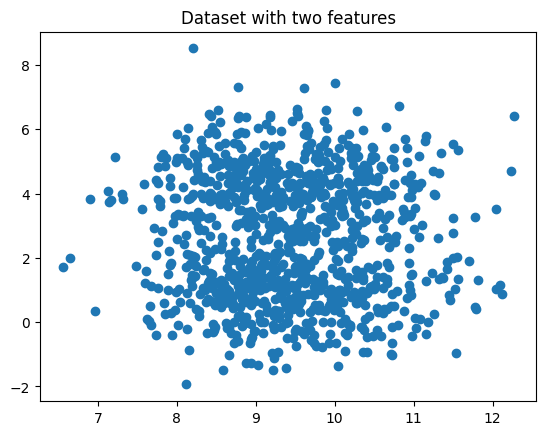

In [123]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
## Create sample dataset with sklearn 

n_samples = 1000
n_features = 2
centers = 2     # We will start with 2 datasets

data =  make_blobs(n_samples = n_samples, 
                   n_features = n_features, 
                   centers = centers, 
                   random_state= 4)
x_data = data[0][:,0]
y_data = data[0][:,1]
plt.scatter(x_data, y_data)
plt.title('Dataset with two features')

Select random positions of centroids

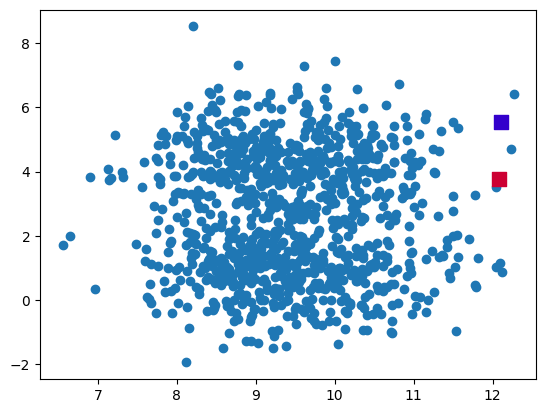

In [151]:
import numpy as np

# Define boundaries of dataset
min_x = data[0][:,0].min()
max_x = data[0][:,0].max()
min_y = data[0][:, 1].min()
max_y = data[0][:,1].max()

# Random positions of 2 centroidsA
np.random.seed(4)
centroid_1 = [(max_x-min_x)*np.random.random()+min_x, (max_y-min_y)*np.random.random()+min_y]
centroid_2 = [(max_x-min_x)*np.random.random()+min_x, (max_y-min_y)*np.random.random()+min_y]

# Plot the positions as squares
plt.scatter(x_data, y_data)
plt.scatter(centroid_1[0], centroid_1[1], 100, marker = "s", color = (0.8, 0, 0.2))
plt.scatter(centroid_2[0], centroid_2[1], 100, marker = "s", color = (0.2, 0, 0.8))

Then we assign the classes closers to the centroids

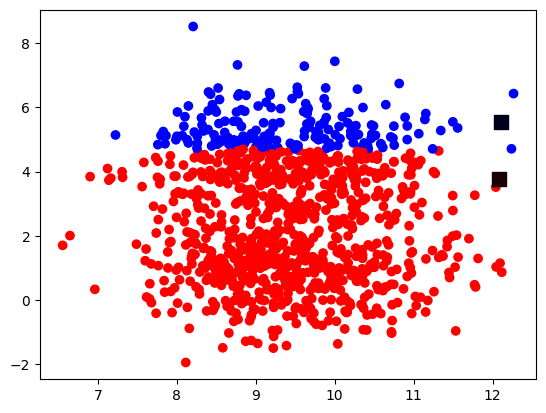

In [152]:
# We calculate the distances from each point to the centroids 
distance_1 = np.sqrt((x_data-centroid_1[0])**2 + (y_data-centroid_1[1])**2)
distance_2 = np.sqrt((x_data-centroid_2[0])**2 + (y_data-centroid_2[1])**2)

# We substract them to compare values and assign classes
# positive -> class 2
# negative -> class 1

distance_compare = distance_1 - distance_2
classes = np.where(distance_compare < 0, 0, 1)
colors = np.where(classes == 0, 'red', 'blue')

# Plot the resulting classes
plt.scatter(x_data, y_data, c = colors)
plt.scatter(centroid_1[0], centroid_1[1], 100, marker = "s", color = (0.1, 0, 0))
plt.scatter(centroid_2[0], centroid_2[1], 100, marker = "s", color = (0, 0, 0.1))

Then we define the new centroids as the mean of the splitted classes, and iterate until convergence

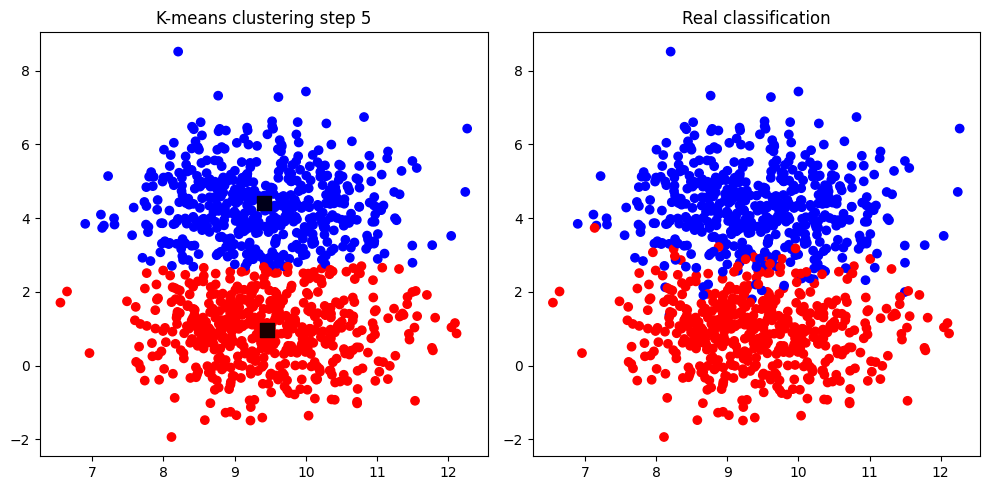

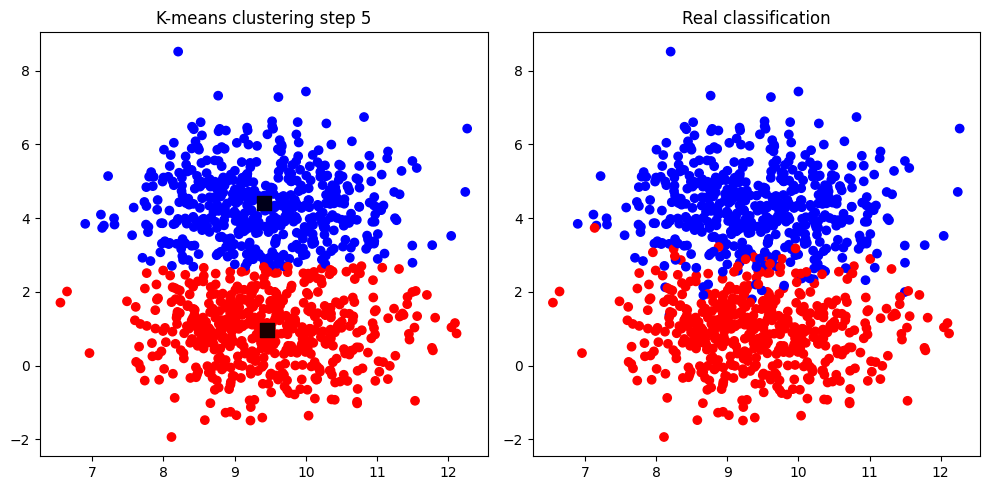

In [153]:
import time
from IPython.display import clear_output, display
#Figure to actualize in each step
plt.ion()  # Turn on interactive mode
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
scatter_kmeans = ax1.scatter(x_data, y_data, c = colors)
class_1 = ax1.scatter(centroid_1[0], centroid_1[1], 100, marker = "s", color = (0.1, 0, 0))
class_2 = ax1.scatter(centroid_2[0], centroid_2[1], 100, marker = "s", color = (0, 0, 0.1))
ax1.set_title('2-means clustering step 0')

# Get labels of real classification 
real_labels = data[1]
real_colors = np.where(real_labels == 0, 'red', 'blue')

scatter_real = ax2.scatter(x_data, y_data, c = real_colors)
ax2.set_title('Real classification')

plt.tight_layout()

# Define initial diff and treshold
diff_1 = 1
diff_2 = 1
treshold = 0.1

step = 1
while diff_1 > treshold or diff_2 > treshold:
    # Obtain the centers of each class
    mean_x1 = x_data[classes == 0].mean()
    mean_y1 = y_data[classes == 0].mean()
    mean_x2 = x_data[classes == 1].mean()
    mean_y2 = y_data[classes == 1].mean()

    # Define this as the centroids
    new_centroid_1 = np.array([mean_x1, mean_y1])
    new_centroid_2 = np.array([mean_x2, mean_y2])

    # Calculate the distances from each point to the centroids 
    distance_1 = np.sqrt((x_data-new_centroid_1[0])**2 + (y_data-new_centroid_1[1])**2)
    distance_2 = np.sqrt((x_data-new_centroid_2[0])**2 + (y_data-new_centroid_2[1])**2)

    # We substract them to compare values and assign classes
    # positive -> class 2
    # negative -> class 1

    distance_compare = distance_1 - distance_2
    classes = np.where(distance_compare < 0, 0, 1)
    colors = np.where(classes == 0, 'red', 'blue')

    # Compare previous centroids with new ones
    diff_1 = np.linalg.norm(centroid_1 - new_centroid_1)
    diff_2 = np.linalg.norm(centroid_2 - new_centroid_2)

    # Assign the new centroids as the previous one for next step
    centroid_1 = new_centroid_1
    centroid_2 = new_centroid_2

    # Plot the resulting classes
    scatter_kmeans.set_color(colors)
    class_1.set_offsets(np.column_stack((centroid_1[0], centroid_1[1])))
    class_2.set_offsets(np.column_stack((centroid_2[0], centroid_2[1])))
    ax1.set_title(f"2-means clustering step {step}")
    
    step += 1
    # Clear previous output and display updated plot
    clear_output(wait=True)

    display(fig)
    time.sleep(2)


## More than 3 clusters
### (Code here is for "k" clusters just change the n_classes variable)

Text(0.5, 1.0, 'Dataset with two features')

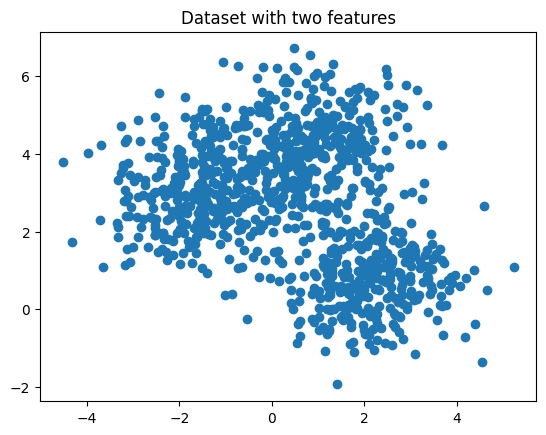

In [257]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
## Create sample dataset with sklearn 

n_samples = 1000
n_features = 2
n_classes = 3     # We will start with 2 datasets

data =  make_blobs(n_samples = n_samples, 
                   n_features = n_features, 
                   centers = n_classes, 
                   random_state= 0)
x_data = data[0][:,0]
y_data = data[0][:,1]
plt.scatter(x_data, y_data)
plt.title('Dataset with two features')

Create random centroids of clusters

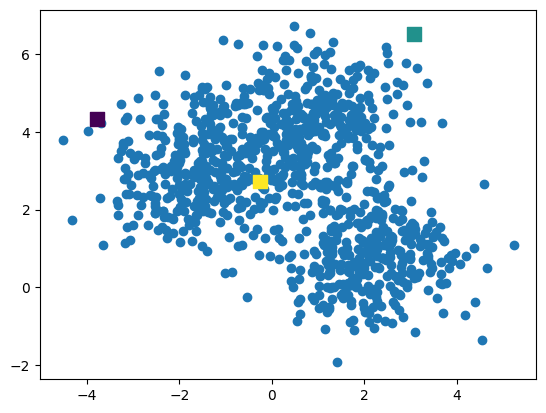

In [258]:
import numpy as np

# Define boundaries of dataset
min_x = data[0][:,0].min()
max_x = data[0][:,0].max()
min_y = data[0][:, 1].min()
max_y = data[0][:,1].max()

# Random positions of 2 centroidsA
np.random.seed(7)

centroids_x = (max_x - min_x)*np.random.random(n_classes) + min_x
centroids_y = (max_y - min_y)*np.random.random(n_classes) + min_y
# Plot the positions as squares
plt.scatter(x_data, y_data)
plt.scatter(centroids_x, centroids_y, 100, marker = "s", c = range(n_classes))

Classify them by the nearest centroid

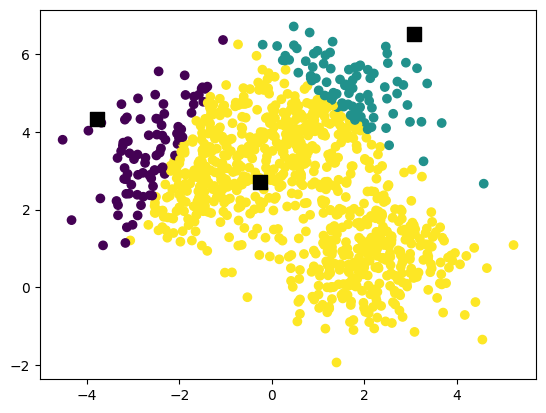

In [259]:
# We calculate the distances from each point to the centroids 
distance = np.zeros((n_classes, n_samples))
for ii in range(n_classes):
    distance[ii, :] = np.sqrt((x_data-centroids_x[ii])**2 + (y_data-centroids_y[ii])**2)

# Minimum distances
classes = np.argmin(distance, axis = 0)

# Plot the resulting classes
plt.scatter(x_data, y_data, c = classes)
plt.scatter(centroids_x, centroids_y, 100, marker = "s", color = (0, 0, 0))

In [371]:
# Let's create a general (k-clusters) process for updating
def update_centroids(x_data, y_data, n_classes):

    new_centroids_x= []
    new_centroids_y= []
    for ii in range(n_classes):
        mean_x = x_data[classes == ii].mean()
        mean_y = y_data[classes == ii].mean()
        new_centroids_x.append(mean_x)
        new_centroids_y.append(mean_y)
    return new_centroids_x, new_centroids_y

def define_classes(x_data, y_data, n_classes, new_centroids_x, new_centroids_y):
    # We calculate the distances from each point to the centroids 
    distance = np.zeros((n_classes, len(x_data)))
    for ii in range(n_classes):
        distance[ii, :] = np.sqrt((x_data-new_centroids_x[ii])**2 + (y_data-new_centroids_y[ii])**2)

    # Minimum distances
    classes = np.argmin(distance, axis = 0)
    return classes



Update algorithm by calculating the center of each cluster and classify them again.

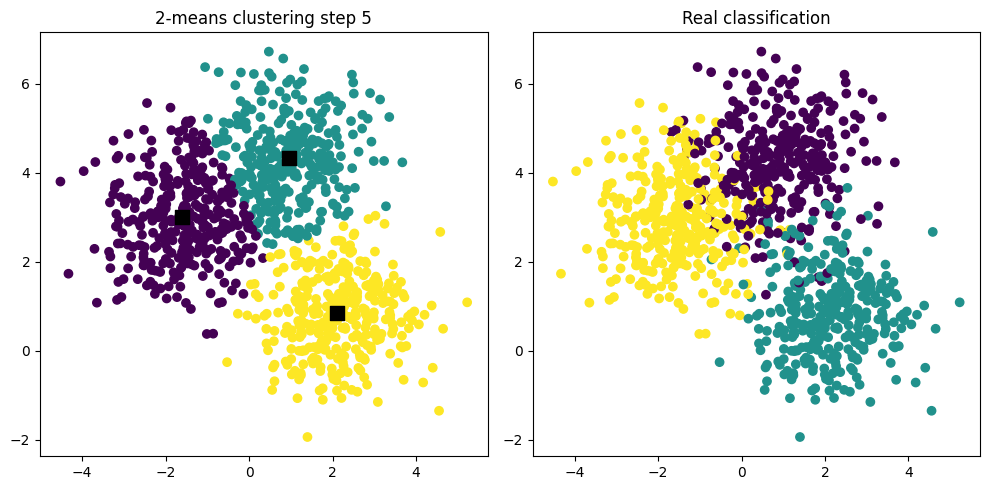

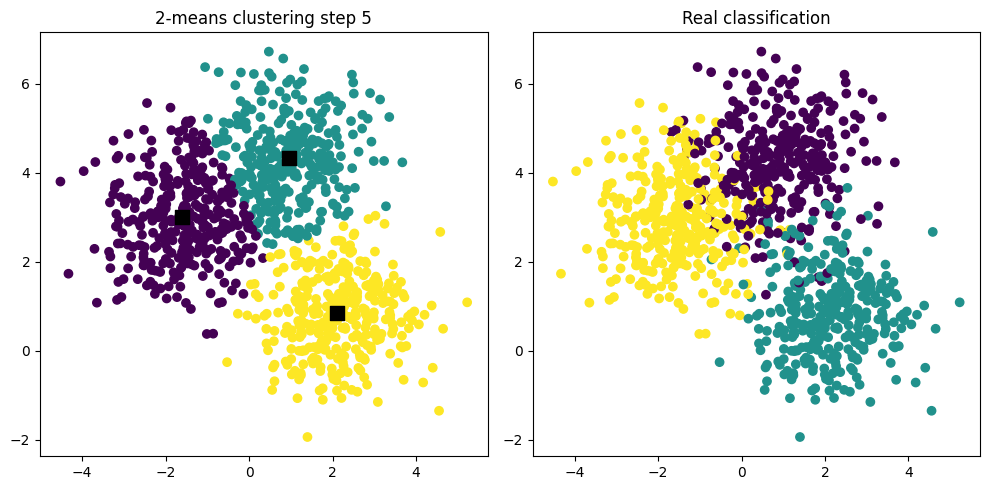

In [260]:
import time
from IPython.display import clear_output, display

#Figure to actualize in each step
plt.ion()  # Turn on interactive mode
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
scatter_kmeans = ax1.scatter(x_data, y_data, c = classes)
centroids_plot = ax1.scatter(centroids_x, centroids_y, 100, marker = "s", color = (0, 0, 0))
    
ax1.set_title(f"{n_classes}-means clustering step 0")

# Get labels of real classification 
real_labels = data[1]

scatter_real = ax2.scatter(x_data, y_data, c = real_labels)
ax2.set_title('Real classification')

plt.tight_layout()

# Define initial diff and treshold
diff = [2, 2]
treshold = 0.1

step = 1
while min(diff) > 0.1:

    new_centroids_x, new_centroids_y = update_centroids(data[0], n_classes)

    classes = define_classes(x_data, y_data, n_classes, new_centroids_x, new_centroids_y)

    # Compare previous centroids with new ones
    diff = []
    for ii in range(n_classes):
        diff.append(np.sqrt((new_centroids_x[ii]-centroids_x[ii])**2 + (new_centroids_y[ii]-centroids_y[ii])**2))

    # Assign the new centroids as the previous one for next step
    centroids_x= new_centroids_x
    centroids_y= new_centroids_y

    # Plot the resulting classes
    scatter_kmeans.set_array(classes)
    centroids_plot.set_offsets(np.column_stack((centroids_x, centroids_y)))
    ax1.set_title(f"2-means clustering step {step}")
    
    step += 1
    # Clear previous output and display updated plot
    clear_output(wait=True)

    display(fig)
    time.sleep(2)

The colors might not be the same, but for the unsupervised models (in this case K-means) we are just creating groups, their color doesn't has a meaning rather than they belong to the same group.

# K++ (Smart initialization of clusters)

Sometimes the initial guess of the centers might be inefficient. One way to improve this is by assigning the next cluster as one of the datapoints with probability $D(x_{i}^{2})/\sum_{i = 1}^{n} D(x_{i})^{2}$ where $D(x_{i})$ is the distance from data point $i$ to the closest centroid.

This way we have more chances of choosing centroids that are appart from each other getting a better initialization

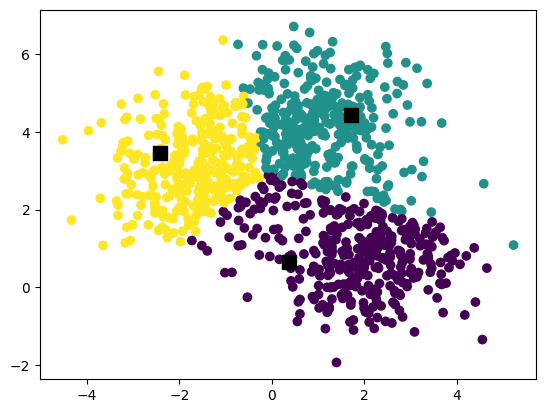

In [370]:
# Let's create a function that calculates the probability for each point

def probability_distribution(data, centroids):
    
    distances = np.zeros((len(centroids), n_samples))
    for ii in range(len(centroids)):
        distances[ii, :] = np.linalg.norm(data-centroids[ii], axis = 1)
    distances = distances.min(axis = 0)
    probs = distances**2/(np.linalg.norm(distances)**2)
    return probs

def init_centroids(n_features, n_classes, data):
    centroids = np.array(np.random.random(n_features))
    centroids = np.expand_dims(centroids, axis=0)
    for ii in range(n_classes-1):
        probs = probability_distribution(data, centroids)
        pos_array = np.random.choice(range(len(data)), p = probs)
        
        new_centroid = data[pos_array]
        new_centroid = np.expand_dims(new_centroid, axis=0)
        centroids = np.concatenate((centroids, new_centroid), axis=0)
    return centroids
    # Plot the centroids and how the clustering is made initially
    # We calculate the distances from each point to the centroids 
centroids = init_centroids(n_features, n_classes, data[0])
distance = np.zeros((n_classes, n_samples))
for ii in range(n_classes):
    distance[ii, :] = np.sqrt((x_data-centroids[ii, 0])**2 + (y_data-centroids[ii, 1])**2)

# Minimum distances
classes = np.argmin(distance, axis = 0)

# Plot the resulting classes
plt.scatter(x_data, y_data, c = classes)
plt.scatter(centroids[:, 0], centroids[:, 1], 100, marker = "s", color = (0, 0, 0))

In [367]:
centroids

array([[ 0.35451102,  0.37837613],
       [-0.17886823,  3.82558106],
       [ 2.99618514,  1.30286774]])

# How many clusters???
This can be defined previously depending on what we need in specific cases.

* If we want a clothing design in 10 different sizes to cover most people (K = 10)
* Clustering similar jobs on 4 CPU cores (K = 4)
* A navigation interface for browsing scientific papers with 20 disciplines (K = 20)

Sometimes we don't know what we need, we can use some metrics to evaluate the clustering performance
* Inertia: $\sum_{i=1}^{n}(x_{i}-C_{k})^2$
* Distortion: ($\frac{1}{n}\sum_{i=1}^{n}(x_{i}-C_{k})^2$)

Usually this values decrease as we increase K, we usually pick the k with the elbow method, i.e., an inflection point.

In [354]:
# Let's create functions to calculate inertia and distortion

def inertia_fun(data, centroids, classes):
    distances = []
    for ii in range(n_classes):
        distances.append(np.linalg.norm(data[classes == ii] - centroids[ii])**2)
    return distance

def distortion(data, centroids, classes):
    return inertia_fun(data, centroids, classes)/len(data)

